In [1]:
import sys
import os
import re
from os.path import isfile, join
import numpy as np
import pandas as pd
# nltk
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
words = set(nltk.corpus.words.words())
#Doc2Vec
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
#t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#DBScan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

[nltk_data] Downloading package stopwords to /home/kbari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kbari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
## Path to text files
path = "/home/kbari/git_repo/FinanceErdosProj/PyMuPdf_Text/"
path1 = "/home/kbari/git_repo/FinanceErdosProj/Tesseract_Text/"

## Load from txt from files to a dataframe; Other information to include possibly?

#pd.read_table(file,header=None,quotechar=None,quoting=3,error_bad_lines=False) for file in DIR]
def txt_to_df(path):
    ''' Put all txt files into single dataframe'''
    DIR = os.listdir(path)
    raw_df_lst = []
    for i in range(len(DIR)):
        with open(path+DIR[i],encoding = "ISO-8859-1") as f:
            lines = f.readlines()
            data = '\n'.join(map(str,lines))
            print(DIR[i])
            p = proj_desc_preprocess(data)
            if p is not None:
                p = p.replace("\n","")
                l = len(p)
            else:
                l = 0
            di= pd.DataFrame([data,p,int(l)],index=['raw_text','proj_desc','num_char'],columns=[DIR[i]]).T
            raw_df_lst.append(di)
    #print(len(raw_df_lst))
    df_raw = pd.concat(raw_df_lst)
    return df_raw

## Grab Project Description   
def proj_desc_preprocess(text):
    ''' Grab Project Description'''
    if len(re.findall('Project Description',text,re.IGNORECASE)) > 0:
        start = 'Project Description'
        end = 'SCHEDULE'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Description of the Project',text,re.IGNORECASE)) > 0:
        start = 'Description of the Project'
        end = 'SCHEDULE'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Program Actions',text,re.IGNORECASE)) > 0:
        start = 'Program Actions'
        end = 'Section II'
        try:
            return text.split(start)[1].split(end)[0]
        except:
            return None
    elif len(re.findall('Schedule 3',text,re.IGNORECASE)) > 0:
        start = 'SCHEDULE 3'
        #end = 'SCHEDULE 3'
        try:
            return text.split(start)[1]
        except:
            return None
    elif len(re.findall('Schedule III',text,re.IGNORECASE)) > 0:
        start = 'SCHEDULE III'
        #end = 'SCHEDULE 3'
        try:
            return text.split(start)[1]
        except:
            return None
    else:
        print('CASE 4')
        return None


In [3]:
df = txt_to_df(path)
df1 = txt_to_df(path1)
dF = pd.concat([df,df1])

2006_july_4_213051468296429321_loan-agreement-l4825-ro-conformed.txt
1996_december_13_893741468282540693_conformed-copy--l4113--public-finance-management-project--loan-agreement.txt
1994_september_30_745841468259144739_conformed-copy--l3792--land-administration-project--loan-agreement.txt
1990_june_22_418341468249703395_conformed-copy--l3188--housing-project--loan-agreement.txt
2009_june_11_345301468026058559_loan-agreement-l7686-cr-conformed.txt
1998_april_8_828001468332701640_conformed-copy--l4301--early-childhood-development-project--loan-agreement.txt
2007_april_16_917181468025771221_loan-agreement--l7434-co--conformed.txt
1997_june_25_702941468094153972_conformed-copy--l4203--social-protection-adjustment-loan--loan-agreement.txt
2011_december_13_303021468123575214_loan-agreement-for-loan-8004-mx-conformed.txt
1995_january_30_863491468145153420_conformed-copy--l3808--financial-sector-deepening-and-intermediation-project--loan-agreement.txt
1991_september_16_374721468231304302_confo

2017_june_16_396601497891460889_official-documents-loan-agreement-for-loan-8724-ma-closing-package.txt
1993_march_8_651541468266685794_conformed-copy--l3562--emergency-reconstruction-and-rehabilitation-project--loan-agreement.txt
2018_august_28_273141536768711170_official-documents-loan-agreement-for-loan-8857-in-and-guarantee-g2580-in-closing-package.txt
2011_march_16_243981468273294964_agreement-for-loan-7997-sv-conformed.txt
1994_may_19_706581468059362717_russia--financial-institutions-development-project-_-loan-3734--loan-agreement--conformed.txt
1992_april_15_949141468057364566_conformed-copy--l3455--third-municipal-development-project--loan-agreement.txt
1997_may_2_658581468053683171_conformed-copy--l4137--community-forestry-project--loan-agreement.txt
2006_july_7_578511468109480557_loan-agreement-l7394-tr-conformed.txt
1994_february_14_142551468309289523_conformed-copy--l3679--private-investment-credit-project--loan-agreement-9.txt
2018_october_12_220221540311015427_official-doc

1993_december_21_504931468241169757_china--telecommunications-project-_-loan-3687--loan-agreement--conformed.txt
2001_august_8_316451468302364587_conformed-copy--l7070--foot-and-mouth-disease-emergency-recovery-project--loan-agreement.txt
2007_july_27_740121468304844950_loan-agreement,-l7467-yf-conformed.txt
1999_march_31_611471468281049038_conformed-copy--l4451--education-sector-support-project--loan-agreement.txt
1998_july_30_379461468033376402_conformed-copy--c3106--uttar-pradesh-diversified-agricultural-support-project--agreement-amending-loan-agreement.txt
CASE 4
2006_may_4_101611468039862344_loan-agreement,-l4819-jm-conformed.txt
2016_september_30_462691476372400722_official-documents-loan-agreement-for-loan-8626-ao-closing-package.txt
1991_january_8_624871468007279337_conformed-copy--l3213--industrial-restructuring-demonstration-project--emb--loan-agreement.txt
2014_november_19_558781468003558232_official-documents-loan-agreement-for-loan-8450-am-closing-package.txt
1999_april_1

2010_july_5_903821468201593328_loan-agreement-for-loan-7932-by-conformed.txt
2011_may_25_571871468024269458_loan-agreement-for-loan-8005-cn-conformed.txt
2014_august_13_264621468282902998_official-documents-loan-agreement-for-loan-8396-id-closing-package.txt
2009_november_30_203251468269693071_loan-agreement-for-loan-7761-mx-conformed.txt
1994_october_21_430941468054662819_conformed-copy--l3770--revenue-enhancement-and-fiscal-management-technical-assistance-project--loan-agreement.txt
1993_september_8_900091468293444286_conformed-copy--l3600--agriculture-sector-adjustment-loan--loan-agreement.txt
2009_may_11_866281468199465765_loan-agreement,-l7595-br-conformed.txt
1998_september_15_653381468110079705_conformed-copy--l4390--second-enterprise-development-adjustment-loan--loan-agreement.txt
2018_july_11_179071533237784834_official-documents-loan-agreement-for-loan-8849-cn-closing-package.txt
2012_may_18_104801468028491901_official-documents-loan-agreement-for-loan-8131-cn-closing-package

2009_june_5_951641468253252841_additional-financing,-loan-agreement,-l7694-in-conformed.txt
1995_april_20_474471468018054581_colombia--agricultural-technology-development-project-_-loan-3871--loan-agreement--conformed.txt
2016_june_23_290801468416522461_official-documents-loan-agreement-for-loan-8627-az,-additional-financing-closing-package.txt
1998_september_15_508851468111253284_conformed-copy--l4285--treasury-system-project--loan-agreement.txt
1994_june_2_297251468023425642_conformed-copy--l3572--tianjin-industrial-development-project--loan-agreement.txt
1991_march_22_692491468292923977_conformed-copy--l3303--second-trade-and-financial-sector-adjustment-loan--loan-agreement.txt
1994_december_19_754611468042936864_conformed-copy--l3818--agriculture-sector-technical-support-project--loan-agreement.txt
1997_may_29_318701468317052385_conformed-copy--l4171--water-supply-and-sanitation-project--loan-agreement.txt
1990_august_16_465311468313479511_conformed-copy--l3151--ankara-sewerage-pro

1998_june_26_765081468012003484_conformed-copy--l4172--inner-mongolia-tuoketuo-thermal-power-project--loan-agreement.txt
2008_august_8_647231468224079285_loan-agreement,-l7511-cn-conformed.txt
2012_january_4_188231468287746708_loan-agreement-for-loan-8087-pa-conformed.txt
1996_august_2_718101468113972133_conformed-copy--l4069--economic-competitiveness-adjustment-loan--loan-agreement.txt
2015_september_30_566401468119081099_official-documents-loan-agreement-for-loan-8531-tr-closing-package.txt
2018_august_1_624731536071375830_official-documents-loan-agreement-for-loan-8884-id-closing-package.txt
2007_december_12_508481468292858403_loan-agreement-for-loan-7495-id-conformed.txt
2017_july_7_415511500642367300_official-documents-loan-agreement-for-loan-8708-pa-closing-package.txt
2001_august_30_436901468259145862_conformed-copy--c3519--western-java-environmental-management-project--loan-agreement.txt
CASE 4
1998_february_4_612081468230947175_conformed-copy--l4237--shandong-environment-proje

1992_october_23_357741468300291882_conformed-copy--l3525--rehabilitation-loan--loan-agreement.txt
1994_december_22_433561468315345418_conformed-copy--l3831--rehabilitation-loan--loan-agreement.txt
1994_october_28_721881468094487213_conformed-copy--l3804--debt-and-debt-service-reduction-loan--loan-agreement.txt
2010_december_3_767571468332400393_loan-agreement-for-loan-7959-ph-conformed.txt
1992_march_9_773891468026331290_conformed-copy--l3425--first-social-development-project--education-and-training--loan-agreement.txt
1993_june_25_464541468267596027_conformed-copy--l3602--cirata-hydroelectric-phase-ii-project--loan-agreement.txt
1999_may_12_350011468274269355_conformed-copy--l4465--telecommunications-post-and-information-technology-sector-adjustment-loan--loan-agreement.txt
2007_march_21_308681468002167124_loan-agreement-l4851-al-conformed.txt
CASE 4
1991_january_30_418061468224673627_conformed-copy--c2201--medium-sized-cities-development-project--loan-agreement.txt
CASE 4
1995_june_2

2008_february_28_582221468332383261_loan-agreement,-l4887-ph-conformed.txt
2013_february_11_919701468217777220_official-documents-loan-agreement,-l8229-am-closing-package.txt
1995_december_5_621361468332426303_peru--rural-road-rehabilitation-and-maintenance-project-_-loan-3962--loan-agreement--conformed.txt
1993_june_14_809321468060911334_conformed-copy--l3618--land-development-project-for-low-income-families--kingdom--loan-agreement-2.txt
2012_november_8_262761468310475540_official-documents-ctf-loan-agreement-for-tf013468-vn-closing-package.txt
CASE 4
1997_september_24_843261468113972715_conformed-copy--l4202--second-municipal-development-project--loan-agreement.txt
1994_september_21_894391468114557703_conformed-copy--l3782--water-supply-and-sewerage-project--loan-agreement.txt
1999_march_11_298071468229162666_conformed-copy--l4303--east-china-jiangsu-power-transmission-project--loan-agreement.txt
2017_september_1_589261507038767028_official-documents-loan-agreement-for-loan-8766-cn-

1991_january_14_586211468016831432_conformed-copy--l3268--private-sector-finance-project--loan-agreement.txt
2014_march_12_983421468262541806_official-documents-loan-agreement,-l8329-jm-closing-package.txt
2019_november_26_188301577484282913_official-documents-amendment-to-the-loan-agreement-for-loan-8486-yf-closing-package.txt
CASE 4
1990_june_12_458961468100490988_pakistan--agricultural-credit-project-_-loan-3226--loan-agreement--conformed.txt
2018_june_29_222971531337660032_official-documents-loan-agreement-for-additional-financing-loan-8887-tn-closing-package.txt
2009_december_3_513001468110352248_loan-agreement-for-loan-7808-mu-conformed.txt
1994_december_6_850401468041489476_conformed-copy--l3744--petroleum-technical-assistance-project--loan-agreement.txt
2002_april_12_948201468273872881_conformed-copy--l4607--irrigation-based-community-development-project--loan-agreement.txt
2009_november_18_248511468100756411_loan-agreement-for-loan-7825-yf-conformed.txt
2012_december_11_725601

2006_may_8_321981468023403055_loan-agreement-l7372-eg-conformed.txt
2006_february_2_141571468119094012_loan-agreement,-l7342-tr-conformed.txt
1997_august_4_657371468042048460_conformed-copy--l4194--bepeka-audit-modernization-project--loan-agreement.txt
2013_may_6_860481468319143945_official-documents-loan-agreement-for-loan-8242-tr-closing-package.txt
1995_october_10_831781488896547933_loan-agreement-for-loan-3838-ph-conformed.txt
2017_july_28_219931502917285987_official-documents-loan-agreement-for-additional-financing-loan-8735-bo-closing-package.txt
2013_may_6_386621468303573394_official-documents-loan-agreement-for-loan-8243-tr-closing-package.txt
2010_november_23_330231468026967107_loan-agreement-for-loan-7972-do-conformed.txt
2017_july_28_395051501600747199_official-documents-loan-agreement-for-loan-8701-co-closing-package.txt
1998_march_4_422411468282541328_conformed-copy--l4287--higher-education-reform-project--loan-agreement.txt
1996_april_23_939351468027851087_conformed-copy-

2003_february_7_744081468054579966_conformed-copy--l4679--alpha-maroc-project--loan-agreement.txt
2001_december_19_754501468241439641_conformed-copy--l7092--structural-fiscal-adjustment-loan--loan-agreement.txt
2002_january_4_765151468009279915_conformed-copy--l7069--financial-system-infrastructure-modernization-project--loan-agreement.txt
2007_july_24_567331468013184157_loan-agreement-l7399-br-conformed.txt
2008_april_30_866501468041091325_loan-agreement-l7494-id-conformed.txt
2010_july_6_733561468119091436_loan-agreement-for-loan-7902-tr-conformed.txt
1991_august_16_737361468273921426_conformed-copy--l3365--financial-sector-development-project--loan-agreement-2.txt
2006_may_17_207231468174539998_loan-agreement-l4822-tr-conformed.txt
1990_september_26_546681468211454433_conformed-copy--l3176--technical-assistance-project--loan-agreement.txt
1990_july_9_410981468296958954_conformed-copy--l3242--first-water-supply,-sewerage-and-sanitation-project--loan-agreement.txt
2002_september_13_37

2013_april_15_918891468224683606_official-documents-loan-agreement-for-loan-8227-cn-closing-package.txt
1990_may_8_403111468023402330_conformed-copy--l3071--agricultural-storage-project--loan-agreement.txt
2019_july_10_527321563303180984_official-documents-loan-agreement-for-additional-financing-loan-8974-tr-closing-package.txt
2011_february_2_587671468090878927_loan-agreement-for-loan-8006-ro-conformed.txt
1996_december_16_886501468276865511_conformed-copy--l4112--power-sector-restructuring-and-transmission-expansion-project--loan-agreement.txt
2006_december_1_572811468024242703_loan-agreement,-l7401-ec-conformed.txt
2008_december_16_913911468058475773_loan-agreement,-l7615-ph-conformed.txt
2018_august_28_285381536850181367_official-documents-loan-agreement-for-loan-8869-in-closing-package.txt
CASE 4
2009_august_24_248441468013142026_loan-agreement-l7688-br-conformed.txt
2008_may_30_150191467999344859_loan-agreement-loan-7472-ar-conformed.txt
2013_september_24_932991468017426535_offic

2002_december_23_599181468122370707_conformed-copy--l7151--northwest-mountainous-and-forestry-areas-development-project--loan-agreement.txt
1993_january_15_167511468334851475_conformed-copy--l3551--environment-and-transport-project--loan-agreement.txt
2007_january_18_109691468087844926_loan-agreement-l7422-jo--cregional-_-local-development--conformed.txt
1992_january_15_441261468203647983_conformed-copy--l3422--primary-education-development-project--loan-agreement.txt
1994_december_15_610961468232507727_columbia--emergency-sector-technical-assistance-project-_-loan-3827--loan-agreement--conformed.txt
2008_august_13_397771468236967236_loan-agreement,-l7547-br-conformed.txt
2018_april_13_123801526569548774_official-documents-loan-agreement-for-loan-8825-mx-closing-package.txt
2017_june_12_670501501701504628_official-documents-loan-agreement-for-loan-8746-in-closing-package.txt
2011_december_2_841591468252591481_loan-agreement-for-loan-8105-id-conformed.txt
1995_december_28_24239146825616

1998_january_20_321871468220769967_conformed-copy--l4150--provincial-agricultural-development-project--loan-agreement.txt
2006_november_27_824541468212689816_loan-agreement-l4841-al-conformed.txt
CASE 4
2016_march_31_581171468225594283_official-documents-loan-agreement,-l8596-bg-closing-package.txt
2014_july_10_686011468094190095_official-documents-loan-agreement-for-loan-8338-yf-closing-package.txt
2013_july_28_461521468050328054_official-documents-loan-agreement-for-loan-8283-jo-closing-package.txt
2013_may_1_101071468074933425_official-documents-loan-agreement-for-loan-8239-pa-closing-package.txt
2008_september_30_110901468297355676_loan-agreement,-l7587-pa-conformed.txt
1995_april_25_200381468092098923_conformed-copy--l3824--management-and-financial-training-project--loan-agreement.txt
2016_march_24_746231468243550488_official-documents-loan-agreement,-l8566-cn-closing-package.txt
2009_september_24_851841468230643506_loan-agreement-for-l7719-br-conformed.txt
2006_april_7_4914414680

2017_october_31_997321546542502557_official-documents-loan-agreement-for-loan-8741-ba-closing-package.txt
2005_august_4_805581468040573451_loan-agreement,-l4788-id-conformed.txt
1991_february_27_660491468204858318_conformed-copy--l3266--science-and-technology-university-development-project--loan-agreement.txt
1991_april_24_247291468293118064_conformed-copy--l3317--oso-condensate-field-development-project--loan-agreement.txt
2002_september_12_604961468093864042_conformed-copy--l7118--second-social-expenditure-management-project--loan-agreement.txt
2004_march_12_227821468110676124_conformed-copy-l7220-loan-agreement.txt
2003_november_11_734811468024291346_conformed-copy--l7194--basic-education-in-western-areas-project--loan-agreement.txt
1990_july_2_291921468295198343_conformed-copy--l3215--energy-resource-development-project--loan-agreement.txt
1995_november_16_390121468026067630_colombia--power-market-development-project-_-loan-3955--loan-agreement--conformed.txt
2018_may_16_5902015277

1990_june_29_129481468286469491_conformed-copy--l3154--third-telecommunications-project--loan-agreement.txt
2014_november_19_387611468052157400_official-documents-loan-agreement-for-loan-8447-mx-closing-package.txt
2011_april_11_906161468217781150_agreement-for-loan-7833-ar-conformed.txt
1995_april_5_791321468131718675_conformed-copy--l3861--rehabilitation-loan--loan-agreement.txt
2006_september_26_405771468112484727_loan-agreement-l4836-ua-conformed.txt
2004_november_10_705791468282907366_loan-agreement,-l4756-in-conformed.txt
CASE 4
2003_august_4_676841468101945485_conformed-copy--l7178--public-finance-management-project--loan-agreement.txt
2006_november_6_558681468270580092_loan-agreement-l4808-kz-conformed.txt
2013_december_6_206161468058781660_official-documents-loan-agreement,-l8316-py-closing-package.txt
2002_march_5_959781468337889424_conformed-copy--l4644--rural-enterprise-support-project--loan-agreement.txt
2007_october_1_997031468279286314_loan-agreement,-l7447-na-conformed.

2018_december_18_501341559672779905_official-documents-amendment-to-the-loan-agreement-for-loan-8466-al.txt
1994_february_25_868191468278668693_malaysia--second-rubber-industry-smallholders-development-authority-project-_-loan-3699--loan-agreement--conformed.txt
2017_december_19_437871516987960262_official-documents-loan-agreement-for-loan-8784-ph-closing-package.txt
1991_december_23_984961468245991797_conformed-copy--c2323--human-resources-development-credit--loan-agreement.txt
2016_may_31_845641468514576917_official-documents-loan-agreement-for-loan-8616-cn-closing-package.txt
1996_october_2_762731468297273286_conformed-copy--l4096--reform-of-higher-education-and-research-project--loan-agreement.txt
1990_november_7_342581468033677831_conformed-copy--l3259-second-petrochemicals-development-project--loan-agreement.txt
1994_january_27_601651468009004254_locust-control-loan-3690-dz-conformed.txt
2018_july_19_951571532634038348_official-documents-loan-agreement-for-additional-financing-lo

2014_march_17_423451468260077331_official-documents-loan-agreement-for-loan-8336-id-closing-package.txt
2017_august_21_254411505932604163_official-documents-loan-agreement-for-loan-8767-jo-closing-package.txt
2000_january_20_582701468333300909_conformed-copy--l4520--rural-environmental-protection-project--loan-agreement.txt
1995_october_18_863591468001147800_conformed-copy--l3927--mining-development-technical-assistance-project--loan-agreement.txt
1996_december_16_321441526568585215_conformed-copy--l4081--social-insurance-administration-project--loan-agreement.txt
2013_june_14_609231468024270314_official-documents-loan-agreement,-l8233-cn-closing-package.txt
2005_december_16_546851468275701177_loan-agreement-l7350-ma-conformed.txt
2000_february_25_586621468095351996_conformed-copy--l4535--social-expenditure-management-project--loan-agreement.txt
2003_february_10_100261468251185109_conformed-copy--l7104--third-integrated-financial-management-technical-assistance-project--loan-agreement.

1991_february_11_164661468281042835_conformed-copy--l3277--environmental-monitoring-and-development-project--loan-agreement.txt
1992_november_16_419241468092098634_conformed-copy--l3513--rehabilitation-loan--loan-agreement.txt
2003_january_20_610721468296137786_conformed-copy--l7153--autonomous-region-in-muslim-mindanao-armm-social-fund-project--loan-agreement.txt
1996_september_23_940591468041697866_conformed-copy--l4017--second-east-java-urban-development-project--loan-agreement.txt
2008_may_15_682721468022139641_loan-agreement,-l7512-eg-conformed.txt
2002_february_8_156561468298784391_conformed-copy--l4605--education-reform-project--loan-agreement.txt
2006_april_4_626081468236345937_loan-agreement-l7336-sv-conformed.txt
2002_july_29_675451468299212662_conformed-copy--l7128--education-improvement-project--loan-agreement.txt
2019_june_4_131841572547989182_official-documents-loan-agreement-for-loan-8934-in-closing-package.txt
2008_february_26_701241468032109436_loan-agreement,-l7417-gt

2016_july_26_457711470237297208_official-documents-loan-agreement-for-loan-8609-ma-closing-package.txt
1996_september_27_445611468274161456_conformed-copy--l4024--basic-education-project--loan-agreement.txt
1991_may_7_374751468306855715_conformed-copy--l3234--third-highway-sector-project--loan-agreement-3234-yu.txt
1991_november_27_874101468288598269_conformed-copy--l3335--karachi-port-modernization-project--loan-agreement.txt
2008_may_27_862141468260951524_loan-agreement-l7546-do-conformed.txt
1993_december_3_533231468123871516_conformed-copy--l3664--fifth-water-supply-project--kingdom--loan-agreement-1.txt
2010_december_9_365541468215962221_loan-agreement-for-loan-7732-br-conformed.txt
2008_may_28_752761468312856582_loan-agreement,-l7539-tr-conformed.txt
1998_july_31_470981468230071027_conformed-copy--c3097--guangxi-urban-environment-project--loan-agreement.txt
CASE 4
1991_june_20_936781468260123642_conformed-copy--l3320--industrial-restructuring-project--loan-agreement.txt
1997_nove

1999_september_2_714891468222293536_conformed-copy--l4444--container-transport-project--loan-agreement.txt
1990_march_29_641961468233042923_conformed-copy--l3162--fourth-small-scale-enterprise-project--loan-agreement.txt
2007_april_16_652941468333875429_loan-agreement-l7423-pe--conformed.txt
1991_may_3_374971468052775364_conformed-copy--l3298--fifth-population-family-planning-and-safe-motherhood-project--loan-agreement.txt
1991_august_16_899631468287374650_conformed-copy--l3365--financial-sector-development-project--loan-agreement-1.txt
2001_august_23_881331468025810381_conformed-copy--l7068--health-sector-strengthening-and-modernization-project--loan-agreement.txt
2012_may_8_677231468011425968_official-documents-loan-agreement-for-loan-8122-cn-closing-package.txt
2009_september_4_814781467991010123_loan-agreement-for-loan-7751-am-conformed.txt
2015_november_30_493481468110945321_official-documents-loan-agreement-for-loan-8541-tr-closing-package.txt
2019_june_27_468681572536965029_offi

2009_september_10_579231468230642869_loan-agreement-l7675-br-conformed.txt
1994_june_9_879651468055455260_mexico--second-water-supply-and-sanitation-sector-project-_-loan-3751--loan-agreement--conformed.txt
2008_april_11_386241468304777422_loan-agreement,-l7510-yf-conformed.txt
1993_june_14_309781468123870851_conformed-copy--l3618--land-development-project-for-low-income-families--kingdom--loan-agreement-1.txt
1998_october_14_180051468176634903_conformed-copy--l4324--kiev-district-heating-improvement-project--loan-agreement.txt
1999_march_11_696561468229160796_conformed-copy--c3165--anning-valley-agricultural-development-project--loan-agreement.txt
CASE 4
2013_june_4_818281468027612969_official-documents-loan-agreement,-l8256-cn-closing-package.txt
2007_june_21_276911468302441433_loan-agreement-l7452-uy-conformed.txt
1994_february_14_131331468313475144_conformed-copy--l3673--private-investment-credit-project--loan-agreement-3.txt
2002_september_30_290091468051037157_conformed-copy--l71

1998_october_5_987681468054589822_conformed-copy--l4289--water-resources-management-project--loan-agreement.txt
2004_december_22_314271468268173519_loan-agreement,-l4762-id-conformed.txt
2008_july_17_309471468015287619_loan-agreement,-l7531-cn-conformed.txt
2001_june_26_353181468287391117_conformed-copy--l4614--second-rural-roads-project--loan-agreement.txt
2007_june_7_904661468098992432_loan-agreement-l7454-pk-conformed.txt
CASE 4
1991_may_29_404251468296116099_conformed-copy--l3319--telecommunications-project--loan-agreement.txt
1992_april_27_832431468283176234_conformed-copy--l3459--enterprise-reform-loan--loan-agreement.txt
2015_december_17_350141468038663846_official-documents-loan-agreement,-l8577-iq-closing-package.txt
2008_february_2_892501468272696929_loan-agreement-for-loan-4874-kz-conformed.txt
2011_december_7_230171468281114810_loan-agreement-for-loan-8088-ma-conformed.txt
1997_august_4_213591468044138804_conformed-copy--l4193--quality-of-undergraduate-education-project--lo

2009_june_26_660021468011125416_loan-agreement-l7693-cn-conformed.txt
2017_june_21_293831506092304203_official-documents-loan-agreement-for-loan-8705-lb-and-cff-tf0a4481-closing-package.txt
1998_september_14_252631468046799774_conformed-copy--l4385--financial-and-corporate-restructuring-assistance-project--loan-agreement.txt
2010_june_17_321391468275663666_loan-agreement-for-loan-7879-ma-conformed.txt
2005_october_4_743181468241783364_loan-agreement,-l7293-co-conformed.txt
2010_july_19_201181468024249523_loan-agreement-for-loan-7916-sv-conformed.txt
2016_march_17_495471468015056114_official-documents-loan-agreement,-l8442-br-closing-package.txt
1995_november_2_752631468021604605_conformed-copy--l3847--technology-development-project--loan-agreement.txt
1990_september_24_172681468175480879_conformed-copy--l3217--agricultural-research-and-extension-project--loan-agreement.txt
1998_september_9_425821468045864522_conformed-copy--l4380--rural-development-project--loan-agreement.txt
2015_octo

2009_september_24_970851468263714796_loan-agreement-for-l7797-lv-conformed.txt
1993_march_25_615781468174541838_conformed-copy--l3565--bursa-water-and-sanitation-project--water-supply-and-sewerage--loan-agreement-1.txt
2016_april_12_988651468018572376_official-documents-loan-agreement-for-loan-8558-co-closing-package.txt
1999_july_14_567741468033840616_conformed-copy--l4478--second-tamil-nadu-urban-development-project--loan-agreement.txt
1994_december_13_484971468233704986_ecuador--public-enterprise-reform-_-loan-3821--loan-agreement--conformed.txt
2001_november_19_373991468296710811_conformed-copy--l7080--lgu-urban-water-and-sanitation-project--phase-ii--loan-agreement.txt
1993_april_16_479301468057557437_conformed-copy--l3485--oro-smallholder-oil-palm-development-project--loan-agreement.txt
2006_september_5_648511468026098579_loan-agreement-l7365-co-conformed.txt
2008_may_19_410531468199468162_loan-agreement,-l7437-br-conformed.txt
2000_may_19_773871468251962188_conformed-copy--l4056

1991_january_23_692111468057300727_conformed-copy--l3287--industrial-restructuring-project--loan-agreement.txt
2013_november_11_528351468246656628_official-documents-loan-agreement-for-loan-8285-ec-closing-package.txt
2014_august_26_843341468017428023_official-documents-loan-agreement-for-loan-8271-br-closing-package.txt
2003_july_24_884791468276867774_conformed-copy--l7166--cutural-heritage-and-urban-development-project--loan-agreement.txt
2002_december_6_661281468025802022_conformed-copy--l7144--early-childhood-education-project--loan-agreement.txt
2014_november_12_260281468322139923_official-documents-loan-agreement-for-loan-8417-vn-closing-package.txt
1998_november_20_508811468096558366_conformed-copy--l4410--public-policy-reform-adjustment-loan--loan-agreement.txt
2016_january_14_346251468250291959_official-documents-loan-agreement,-l8564-ga-closing-package.txt
2012_december_14_706981468204878037_official-documents-loan-agreement,-l8211-al-closing-package.txt
2002_april_24_7782614

1992_july_8_943541468033838451_conformed-copy--l3498--second-maharashtra-power-project--loan-agreement.txt
2017_june_5_403281502906555306_official-documents-loan-agreement-for-loan-8754-in-closing-package.txt
2019_november_28_257901576010828034_official-documents-additional-financing-agreement-for-loan-8967-ph-closing-package.txt
2011_march_3_382441468216570833_loan-agreement-for-loan-8001-cn-conformed.txt
2015_july_2_416021468300616221_official-documents-loan-agreement-for-loan-8507-ma-closing-package.txt
2011_december_5_990041489678782425_official-documents-ctf-loan-agreement-for-tf010407.txt
CASE 4
1990_january_25_707061468302738531_conformed-copy--l3153--technical-assistance-project--loan-agreement.txt
1999_may_28_762841468267592009_conformed-copy--l4471--social-safety-net-adjustment-loan--loan-agreement.txt
2011_june_14_557751468123575452_agreement-for-loan-7973-mx-conformed.txt
1993_may_26_725001468041694414_conformed-copy--l3579--eastern-indonesia-kabupaten-roads-project--loan-a

1997_may_16_985841468047344502_conformed-copy--l4146--registration-and-real-estate-rights-pilot-project--loan-agreement.txt
1995_october_8_341211468056438079_conformed-copy--l3908--port-development-and-environment-protection-project--loan-agreement.txt
1995_november_30_242591468038055881_el-salvador--basic-education-modernization-project-_-loan-3945--loan-agreement--conformed.txt
1999_july_27_375001468012335228_conformed-copy--l4453--liaoning-urban-transport-project--loan-agreement.txt
CASE 4
1997_july_18_450811468059375656_conformed-copy--l4111--second-subic-bay-freeport-project--loan-agreement.txt
2010_december_21_492921468286286113_loan-agreement-for-loan-7976-pe-conformed.txt
2010_august_11_181131468221989871_loan-agreement-for-loan-7889-az-conformed.txt
2010_june_10_288401468014434513_loan-agreement,-l7660-br-conformed.txt
2012_april_20_481801468049880020_official-documents-loan-agreement-for-loan-8138-mu-closing-package.txt
2001_may_31_473681468094784501_conformed-copy--l7054--ra

1996_january_18_949521468090881196_romania--railway-rehabilitation-project-_-loan-3976--loan-agreement--conformed.txt
1995_march_30_536101468037750899_jordan--second-human-resources-development-sector-investment-project-_-loan-3864--loan-agreement--conformed.txt
2013_february_26_949961468253839357_official-documents-amendment-to-the-loan-agreement-for-loan-7562-jo.txt
1996_january_18_695781468057888949_romania--financial-and-enterprise-sector-adjustment-loan-_-loan-3975--loan-agreement--conformed.txt
1992_may_12_168201468051268836_india--second-national-highway-project-_-credit-2365--loan-agreement--conformed.txt
CASE 4
2019_september_13_710891569417913880_official-documents-loan-agreement-for-loan-8798-co-closing-package.txt
1998_may_29_174761468024555334_china--yangzhou-thermal-power-project-_-loan-3718--loan-agreement--1--conformed.txt
2013_december_12_834031468224425505_official-documents-loan-agreement-for-loan-8201-br-closing-package.txt
2014_september_8_631351468333069662_offici

1990_may_1_670561468035072614_india--technical-education-project-_-credit-2130--loan-agreement--conformed.txt
CASE 4
2014_june_12_775451468002389223_official-documents-loan-agreement-for-loan-8286-az-closing-package.txt
2019_august_27_710931567604435090_official-documents-loan-agreement-for-loan-8973-ua-closing-package.txt
1994_july_5_501631468240315423_china--enterprise-housing-and-social-security-reform-project-_-loan-3773--loan-agreement--conformed.txt
CASE 4
1995_february_28_436441468260637740_indonesia--second-rural-electrificaion-project-_-loan-3845--loan-agreement--conformed.txt
2014_december_9_318201468006913878_official-documents-scf-loan-agreement-for-tf016083-closing-package.txt
2019_october_18_193061571672925103_official-documents-loan-agreement-for-loan-9010-mk-closing-package.txt
2019_march_14_129231553614210658_official-documents-loan-agreement-for-loan-8925-ma-closing-package.txt
2019_may_8_404361559247121443_official-documents-loan-agreement-for-additional-financing-sc

1994_march_24_717031468233074159_egypt--agricultural-modernization-project-_-loan-3719--loan-agreement--conformed.txt
2012_november_5_787801468253229543_official-documents-loan-agreement-for-loan-8136-in-closing-package.txt
2016_november_23_297301481556981572_official-documents-loan-agreement-for-loan-8647-cn-closing-package.txt
1994_november_15_638351468096860331_pakistan--financial-sector-deepening-and-intermediation-project-_-loan-3808--loan-agreement--conformed.txt
1994_march_25_438461468050043166_indonesia--skills-development-project-_-loan-3721--loan-agreement--conformed.txt
2019_january_23_942741549035803818_official-documents-loan-agreement-for-loan-8878-lk-closing-package.txt
1994_june_21_949461468298473009_russia--enterprise-support-project-_-loan-3763--loan-agreement--conformed.txt
2018_march_21_242371523655115729_official-documents-loan-agreement-for-loan-8831-yf-closing-package.txt
2014_april_30_286421468026368837_official-documents-loan-agreement,-l8364-hr-closing-package

In [4]:
## Drop null proj desc
dG = dF.dropna()
print(dG.shape)

(2941, 3)


In [18]:
W = ['principal','amount','withdrawal','withdrawn','subject','plan','taken','least','schedule','training','carrying','technical','capacity','following','agree','upon','said','part','made','paragraph','implementation','borrower','date','strengthen','assistance','support','january','february','march','april','may','june','july','august','september','october','november','december','for','management','section','id','the','payment','objective','improvement','provision','bank','project','system','program','sector','time','loan','development','shall','set','forth','agreement','general','improve','improvement','down','strengthening']


def text_preprocess(text):
    '''
    Remove all punctuation,stopwords, non-english words, numbers, lemmatize -> returns list of words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word for word in nopunc.split() if word.isalnum()]
    nopunc =  [word.lower() for word in nopunc if word not in stopwords.words('english')]
    nopunc =  [word for word in nopunc if len(word)>2]
    nopunc = [word for word in nopunc if word not in W]
    nopunc = [w for w in nopunc if w.lower() in words or not w.isalpha()]
    return [stemmer.lemmatize(word) for word in nopunc]

In [19]:
docLabels= dG.index
data = dG.proj_desc

In [20]:
i = 2842
print(data[i])
print(text_preprocess(data[i]))

The objective of the Project is to improve access to affordable housing for Lower IncomeHouseholds.Part 1.(a)(b)Part 2.(a)(b)(c)The Project consists of the following parts:Mortgage-Linked Down Payment AssistanceMortgage-Linked Down Payment Assistance (BP2BT). Provision of mortgage-linked downpayment assistance for Lower Income Households, which are first time home-owners, throughParticipating Lending Institutions, for the purchase or construction of a residential property.Technical Assistance for Mortgage-Linked Down Payment Assistance. Provision of technicalassistance for: (1) developing and strengthening BP2BT management, administrative andinformation technology systems and capacities; (11) supporting BP2BT operations and thedevelopment of a rigorous monitoring and evaluation methodology and system, including abaseline study; (111) developing consumer financial literacy around BP2BT; (iv) developing aBP2BT public information campaign; and (v) developing and strengthening the lendingc

In [21]:
list_id = list(dG.index)
list_def = list(dG['proj_desc'])

tagged_data = [TaggedDocument(words=text_preprocess(term_def), tags=[list_id[i]]) for i, term_def in enumerate(list_def)]

In [22]:
## Training
max_epochs = 500
vec_size = 200
alpha = 0.025

d2v_model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm=1)
d2v_model.build_vocab(tagged_data)

In [23]:
len(d2v_model.wv.index_to_key)

7516

In [11]:
## Create doc2vec model
for epoch in range(max_epochs):
    if epoch % 25 == 0:
        print('iteration {0}'.format(epoch))

    d2v_model.train(tagged_data,
                total_examples=d2v_model.corpus_count,
                epochs=d2v_model.epochs)
    ## Slow down training
    d2v_model.alpha -= 0.0002
    d2v_model.min_alpha = d2v_model.alpha
## Clean and re-run
d2v_model.save("d2v.model")

iteration 0
iteration 100
iteration 200
iteration 300
iteration 400


In [12]:
## Finds most similar terms
d2v_model.wv.most_similar("health")

[('especially', 0.37867817282676697),
 ('unserved', 0.3641902804374695),
 ('teenage', 0.3433000445365906),
 ('parental', 0.3392327129840851),
 ('semiurban', 0.3371935188770294),
 ('infant', 0.3329731822013855),
 ('standardize', 0.32157301902770996),
 ('oxidation', 0.3188793361186981),
 ('enrolment', 0.31480446457862854),
 ('centered', 0.3138587772846222)]

In [13]:
d2v_model.wv.most_similar("finance")

[('subdirector', 0.4434542953968048),
 ('justice', 0.4117014706134796),
 ('forensic', 0.3905404508113861),
 ('removing', 0.3605889678001404),
 ('referendum', 0.34578850865364075),
 ('interior', 0.3450564742088318),
 ('trestle', 0.3316262662410736),
 ('clinic', 0.32088178396224976),
 ('meteorology', 0.3208138942718506),
 ('blueprint', 0.31238120794296265)]

In [14]:
d2v_model.wv.most_similar("agriculture")

[('diversify', 0.33893075585365295),
 ('exploit', 0.32208842039108276),
 ('dean', 0.3143901526927948),
 ('income', 0.3097354769706726),
 ('depositor', 0.3050313889980316),
 ('nonrecurrent', 0.2966851592063904),
 ('associative', 0.2917470932006836),
 ('moph', 0.29143187403678894),
 ('occupation', 0.2899866998195648),
 ('edible', 0.2864686846733093)]

In [15]:
#d2v_model.wv.most_similar("spaghetti")

In [16]:
## Documents as vectors (how many vectors)
print(len(d2v_model.dv.vectors))
## Dimension of space
print(len(d2v_model.dv.vectors[1]))

2941
200


In [17]:
vecs = d2v_model.dv.vectors

# Google Model

In [132]:
import gensim

In [134]:
google_model = gensim.models.KeyedVectors.load_word2vec_format('/home/kbari/Documents/Erdos/GoogleNews-vectors-negative300.bin', binary=True)  

In [138]:
google_model.most_similar("health")

[('heath', 0.7908358573913574),
 ('2_wks_Vac', 0.6552658081054688),
 ('Health', 0.6324247717857361),
 ('heatlh', 0.6257526874542236),
 ('helath', 0.5969439744949341),
 ('health_care', 0.5952811241149902),
 ('heath_care', 0.5900787711143494),
 ('healthcare', 0.5859715342521667),
 ('wellness', 0.577788770198822),
 ('WholeCamels_Bad_sign', 0.5677785277366638)]

# Hierarchal Clustering

In [206]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=None, n_clusters=11)

In [207]:
model = model.fit(vecs)

In [208]:
# Number of clusters
print(model.n_clusters_)
# labels
h_labels = model.labels_

11


# t-SNE for some visualizations

In [218]:
#print(d2v_model.dv.__dict__.keys())
#print(d2v_model.dv.key_to_index.keys())
doc_tags = list(d2v_model.dv.key_to_index.keys())
X = d2v_model[doc_tags]

In [219]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

/home/kbari/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/kbari/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [220]:
def plotScatter(keyword):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(1, 1, 1)

    pos_found_x = []
    pos_found_y = []
    found_names = []

    pos_rest_x = []
    pos_rest_y = []

    for term_id, pos in df.iterrows():
        term_name = term_id #dG[dG['index'] == term_id]['name'].values[0]
        term_def = dG[dG.index == term_id]['proj_desc'].values[0].lower()

        if keyword in term_def:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        elif keyword in term_def:
            pos_found_x.append(pos['x'])
            pos_found_y.append(pos['y'])
        else:
            found = False
            is_a_list = term_id #dG[dG.index == term_id]['is_a'].tolist()[0]

            for is_a_id in is_a_list:
                if len(dG[dG.index == is_a_id]) > 0:
                    if keyword in term_def:#dG[dG.index == is_a_id]['name'].values[0]:
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break
                    elif keyword in dG[dG.index == is_a_id]['proj_desc'].values[0].lower():
                        pos_found_x.append(pos['x'])
                        pos_found_y.append(pos['y'])
                        found = True
                        break

            if found == False:
                pos_rest_x.append(pos['x'])
                pos_rest_y.append(pos['y']) 

    ax.scatter(pos_rest_x, pos_rest_y, c='blue')       
    ax.scatter(pos_found_x, pos_found_y, c='red')

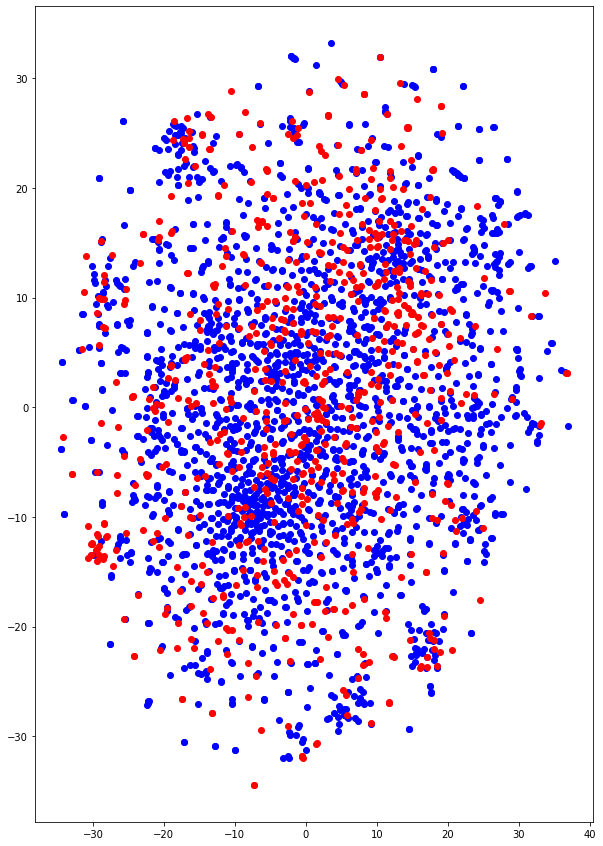

In [103]:
plotScatter(keyword="communication")

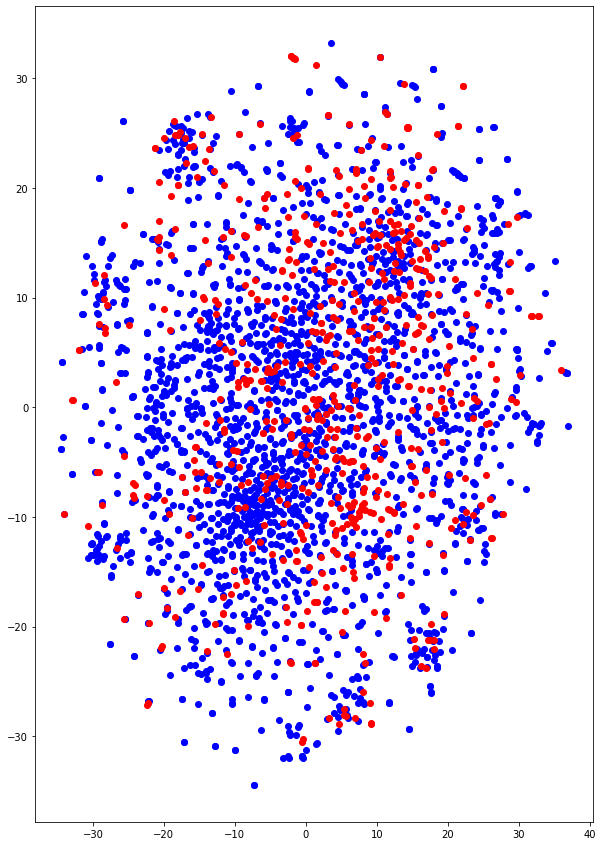

In [104]:
plotScatter(keyword="education")

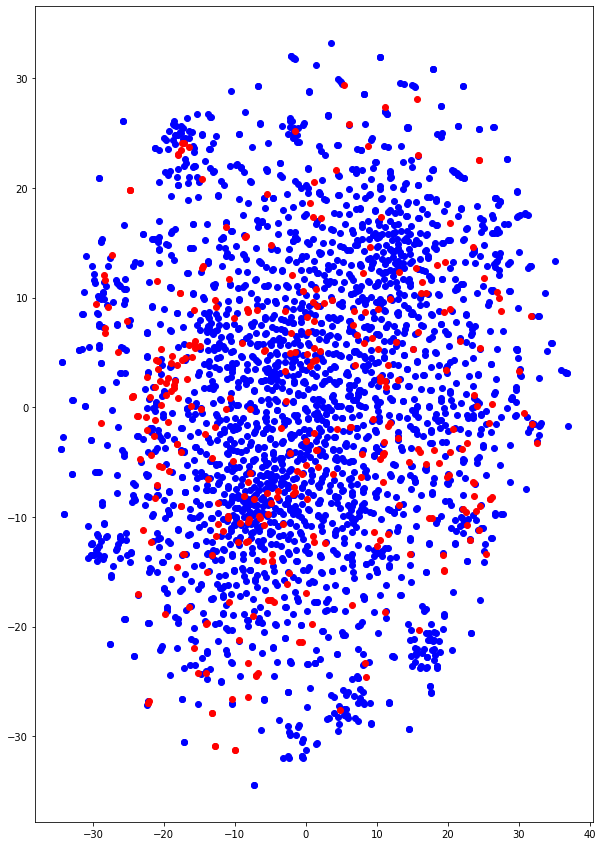

In [105]:
plotScatter(keyword="energy")

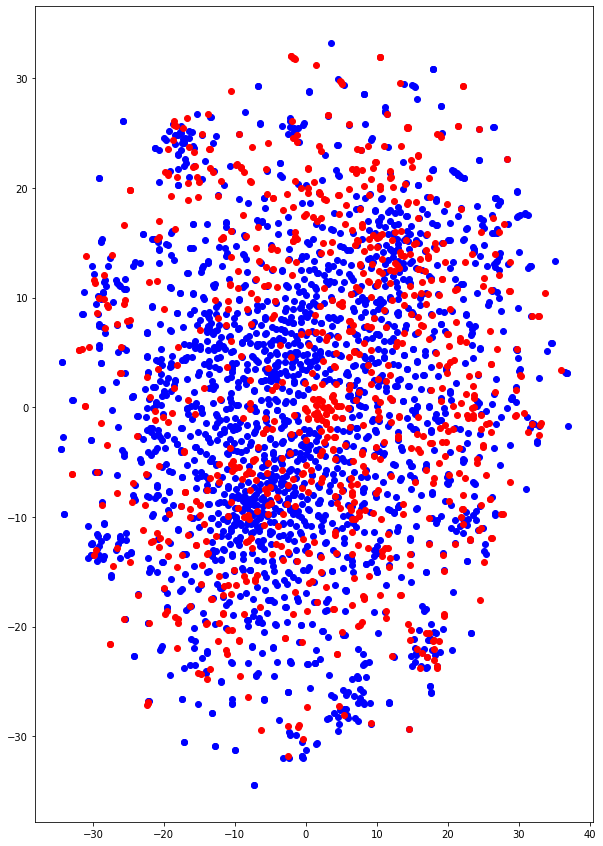

In [106]:
plotScatter(keyword="social")

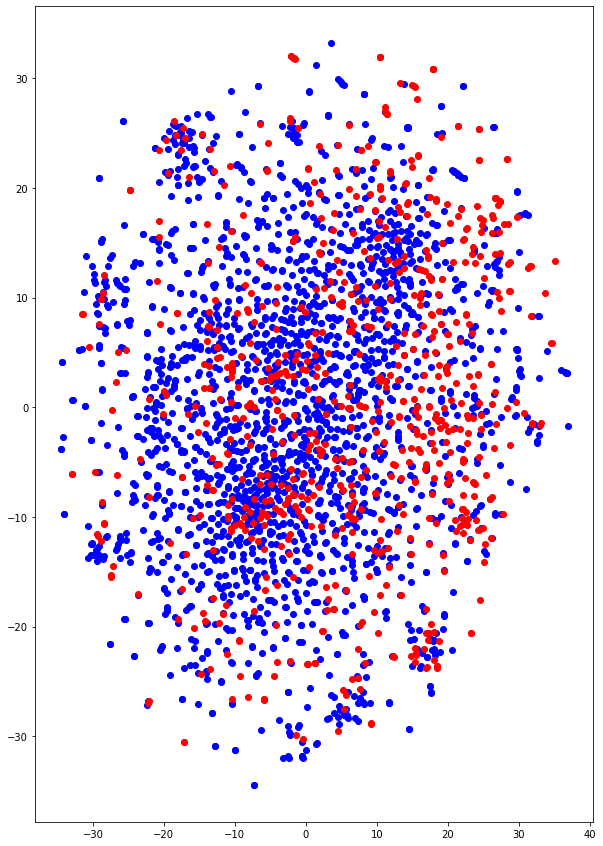

In [107]:
plotScatter(keyword="finance")

# UMAP for visualization

In [125]:
#!{sys.executable} -m pip uninstall umap --yes
import umap
reducer = umap.UMAP()

AttributeError: module 'umap' has no attribute 'UMAP'

In [ ]:
data = vecs #dG[["","culmen_depth_mm","flipper_length_mm","body_mass_g"]].values
scaled_data = StandardScaler().fit_transform(data)

In [ ]:
embedding = reducer.fit_transform(scaled_data)
embedding.shape

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

# PCA

In [108]:
vecs = d2v_model.dv.vectors

In [109]:
X = StandardScaler().fit_transform(vecs)

In [110]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [111]:
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.099184,2.088871,-6.055180,3.729545,-1.630499,2.799885,-2.964596,3.311522,2.952391,-5.955313,6.054902
1,-4.267241,-3.452651,-2.663470,0.061823,-1.347275,5.574062,2.425718,-7.321517,-3.068652,1.014608,2.013833
2,-1.660415,-3.424297,0.459168,-0.653191,-2.013770,-0.505841,-1.010354,3.012595,-0.285856,0.269820,-1.907112
3,-1.009710,-1.913568,-2.702356,1.780669,0.075683,0.246710,-1.987056,-1.254434,-1.483803,-0.335476,-0.875770
4,3.522567,-1.489090,-1.901012,0.678452,-0.550696,0.857212,1.249632,-0.000828,-0.690171,-2.481982,-0.186933


In [112]:
pca.explained_variance_ratio_.sum()

0.27534664

# DBScan for Clustering

In [209]:
dG.columns

Index(['raw_text', 'proj_desc', 'num_char'], dtype='object')

In [216]:
vecs = d2v_model.dv.vectors
print(len(vecs))

2941


In [211]:
## Need to scale data for DBScan
X = StandardScaler().fit_transform(vecs)

In [212]:
db_model = DBSCAN(eps=.0001, min_samples=10)
db_model.fit(X)

DBSCAN(eps=0.0001, min_samples=10)

In [213]:
len(np.unique(db_model.labels_))

1

In [214]:
db_model.labels_[db_model.labels_ == -1].size

2941

In [221]:
#!{sys.executable} -m pip install plotly
import plotly.express as px
    
    
dq = pd.DataFrame(db_model.labels_,index=df.index,columns=['labels'])
dq1 = pd.DataFrame(h_labels,index=df.index,columns=['labels'])
dg = pd.concat([df,dq1],axis=1)
print(dg[:10])

                                                            x          y  \
2006_july_4_213051468296429321_loan-agreement-l...  24.626282  12.786353   
1996_december_13_893741468282540693_conformed-c...  -5.611178   4.786606   
1994_september_30_745841468259144739_conformed-...  35.794052  19.057411   
2009_june_11_345301468026058559_loan-agreement-...  12.812488 -10.352218   
1998_april_8_828001468332701640_conformed-copy-...   7.756204   9.106073   
2007_april_16_917181468025771221_loan-agreement...   5.835845   2.666861   
1997_june_25_702941468094153972_conformed-copy-...   4.472270  -1.516748   
2011_december_13_303021468123575214_loan-agreem...  -5.049936  -0.839948   
1995_january_30_863491468145153420_conformed-co... -26.098404  21.816797   
1991_september_16_374721468231304302_conformed-...   1.828025  -1.907730   

                                                    labels  
2006_july_4_213051468296429321_loan-agreement-l...       1  
1996_december_13_893741468282540693_confo

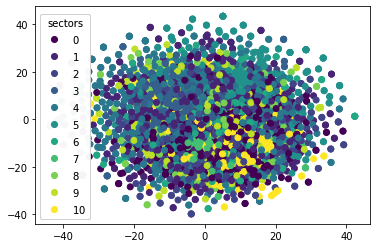

In [222]:
fig, ax = plt.subplots()

scatter = ax.scatter(x=dg['x'], y=dg['y'],c=dg['labels'])

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="sectors")
ax.add_artist(legend1)


plt.show()